# Outbound Marketing Budget Example

Reaching a required number of prospects as cheaply as possible with outbound marketing. It is used often to select among outbound advertising media of varying Reach, Frequency Ad Effectiveness, and Ad Cost to reach a maximum number of prospects while being constrained by the available advertising budget. 	

**Problem:**  

A company must divide a limited outbound broadcast media advertising budget among 3 broadcast media vehicles in order to generate at least 1,000,000 Effective Advertising Impressions at the lowest total cost. The broadcast media vehicles are a local TV station and 2 cable TV stations. Each of the 3 media vehicles is judged to have differing degrees of advertising effectiveness per each individual ad impressions. This is due to differences in viewership demographics and relevancy of the programming to the company’s advertising message. The number of ad impressions for each media vehicle is weighted according to vehicles effectiveness to produce a unit of measure called an Effective Advertising Impression. Given the overall advertising budget and the maximum advertising spending per media vehicle, the overall advertising budget be divided up among the 3 broadcast media vehicles to produce at least 1,000,000 Effective Advertising Impressions as cheaply as possible. 	


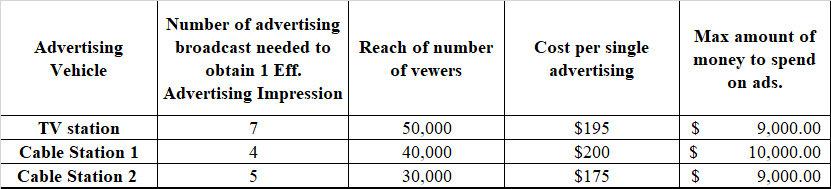




In [10]:
from pulp import *

#Create the problem
prob=LpProblem("Minimize Cost",LpMinimize)

#Define the data 
vehicle=["TV Station", "Cable Station 1","Cable Station 2"]

cost=[195,200,175]

maxmoney=[9000,10000,9000]

viewers=[50000,40000,30000]

advimpress=[7,4,5]

#Create the variables
TVb=LpVariable("TV Station broadcast",0,None, LpInteger)
C1b=LpVariable("Cable Station 1 broadcast",0,None, LpInteger)
C2b=LpVariable("Cable Station 2 broadcast",0,None, LpInteger)


#Objective Function is added
prob+=TVb*cost[0]+C1b*cost[1]+C2b*cost[2]

#Constraints are added
prob+=viewers[0]/advimpress[0]*TVb+viewers[1]/advimpress[1]*C1b+viewers[2]/advimpress[2]*C2b>=1000000
prob+=TVb*cost[0]<=maxmoney[0]
prob+=C1b*cost[1]<=maxmoney[1]
prob+=C2b*cost[2]<=maxmoney[2]

prob.solve()

print("Status :", LpStatus[prob.status])
print("")
for v in prob.variables():
    print(v.name,'=',v.varValue)
print("")
print('Minimun cost=', value(prob.objective))

Status : Optimal

Cable_Station_1_broadcast = 50.0
Cable_Station_2_broadcast = 31.0
TV_Station_broadcast = 44.0

Minimun cost= 24005.0
